# Détection des fraudes

Classification utilisée pour détecter des transactions frauduleuses.  
Les transactions sont classées en "frauduleuses" ou "non frauduleuses" sur la base de caractéristiques telles que le montant, le type de transaction, et le comportement historique du client.

## Importation des données

Pour entrainer le modèle, j'utilise le dataset disponible sur Kaggle:  

**Credit Card Fraud Detection Dataset 2023**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

print("Path to dataset files:", path)

100%|██████████| 143M/143M [00:01<00:00, 87.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1


In [2]:
file_name = !ls '/root/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1'
file_name

['creditcard_2023.csv']

## Analyse exploratoire des données

In [3]:
import os
import pandas as pd

# Create the file_path properly
file_path = os.path.join(path, file_name[0])

# Read csv file as pandas dataframe
data = pd.read_csv(file_path)

In [4]:
data.shape

(568630, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [8]:
# Count the number of occurrences of each class in the label column
class_counts = data['Class'].value_counts()
class_counts

,count
Class,
0,284315
1,284315


On a 568 630 transactions de cartes de crédit de détenteurs Européen.

On dispose de 28 variables standardisées en plus de l'ID de transaction, du montant de la transaction et du label 0 (non frauduleux) ou 1 (frauduleux) soit 31 colonnes au total.

---

On remarque que les données sont déjà standardisées mean=0 et std=1.  
Nous avons uniquement des colonnes numériques (int64/float64).  
Nous n'avons également aucune valeurs manquantes dans ce dataset.  
Nous avon un dataset parfaitement équilibré entre les 2 classes.  

## Preprocessing des données

On mélange les données pour ne pas avoir qu'une seule classe en majorité dans l'apprentissage.  

In [9]:
data.head(3)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0


In [10]:
# Mélange le DataFrame
shuffled_df = data.sample(frac=1, random_state=42)
shuffled_df.head(3)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
437378,437378,0.420468,-0.070194,-0.569266,0.191673,-0.009607,0.426903,-0.356728,0.096143,0.077806,...,0.134969,0.070433,0.047770,-0.851622,0.102876,-0.375436,0.820807,0.665983,8633.18,1
504222,504222,-0.238944,0.250929,-0.374408,0.152938,-0.105008,-0.039028,-0.293004,0.133771,-0.591631,...,0.192405,0.289441,-0.255187,-0.817462,0.308284,1.582688,0.574425,0.478489,12299.55,1
4794,4794,-0.117796,-0.147961,2.130455,-0.325762,0.325616,0.271351,0.772625,-0.244342,1.240012,...,-0.271739,-0.404654,-0.121235,0.857659,0.541920,0.756534,-0.238177,-0.403038,5215.87,0


In [11]:
# Sépare X de Y pour avoir les labels d'un côté et les variables de l'autre
X = data.drop(columns=['Class', 'Amount', 'id'])
Y = data['Class']
X.shape, Y.shape

((568630, 28), (568630,))

In [12]:
import numpy as np

# Met au format numpy pour l'apprentissage
X = X.to_numpy()
Y = Y.to_numpy() #.reshape(-1, 1)
X.shape, Y.shape

((568630, 28), (568630,))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426472, 28), (142158, 28), (426472,), (142158,))

## Création de modèles
### Scikit-learn

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([X[12786]])

array([0])

In [16]:
# Measure performance
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.96683268, 0.96567176, 0.96561548])

In [17]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[208889,   4570],
       [  9913, 203100]])

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train, y_train_pred)

0.9779939326816584

In [20]:
recall_score(y_train, y_train_pred)

0.9534629341871154

In [21]:
f1_score(y_train, y_train_pred)

0.9655726520919552

In [22]:
# Precision Recall Tradeoff
y_scores = sgd_clf.decision_function([X[12786]])
y_scores

array([-5.39025053])

In [23]:
threshold = 0
y_12786_pred = (y_scores > threshold)
y_12786_pred

array([False])

In [24]:
threshold = 300000
y_12786_pred = (y_scores > threshold)
y_12786_pred

array([False])

In [25]:
y_scores = cross_val_predict(
    sgd_clf, X_train, y_train, cv=3,
    method='decision_function'
  )

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

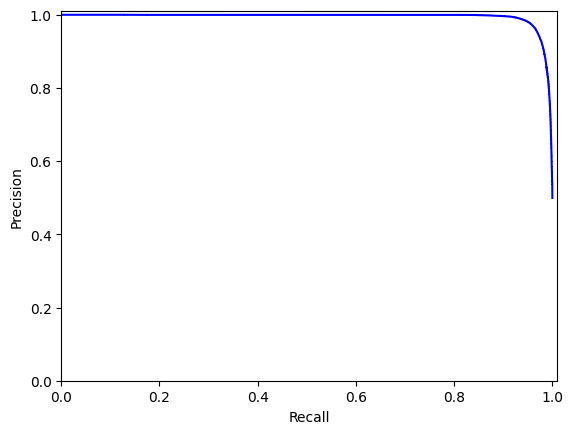

In [27]:
import matplotlib.pyplot as plt

def plot_precision_recall(precisions, recalls):
  plt.plot(recalls, precisions,'b-')
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.xlim([0, 1.01])
  plt.ylim([0, 1.01])
  plt.show()

plot_precision_recall(precisions, recalls)

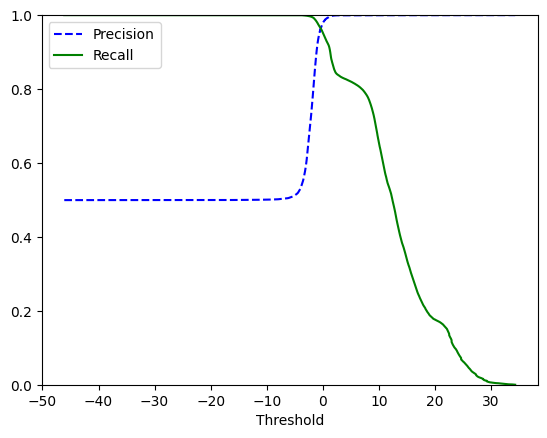

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
  plt.plot(thresholds, recalls[:-1], "g-", label='Recall')
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])
  plt.show()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [29]:
# Moving the threshold of the classification
y_train_pred_99 = (y_scores > 1)

In [30]:
precision_score(y_train, y_train_pred_99)

0.9938143598115915

In [31]:
recall_score(y_train, y_train_pred_99)

0.9201832751991662

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

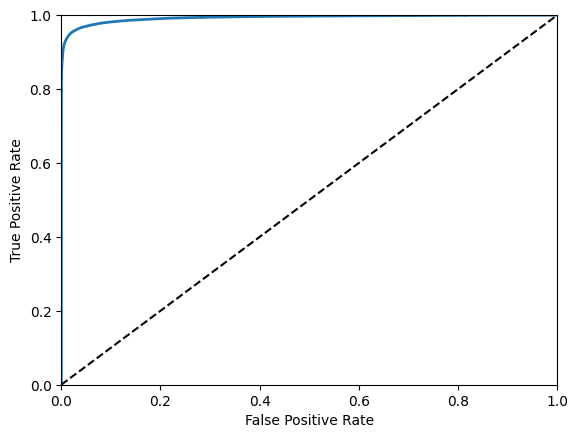

In [33]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

plot_roc_curve(fpr, tpr)

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9927506213447403

### Tensorflow

In [35]:
import tensorflow as tf

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [37]:
# Dense Neural Network -------------------------------------------------------
model = Sequential([

    # Couche d'entrée
    Dense(units=128, activation="relu"),

    # 2eme couche
    Dense(units=64, activation="relu"),

    # 3eme couche
    Dense(units=32, activation="relu"),

    # Couche de sortie - Classification avec sigmoid
    Dense(units=1, activation="sigmoid")
  ])

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Entrainement du modèle

In [39]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks
model_ckp = ModelCheckpoint(
    filepath = "best_model.keras",
    monitor = "val_accuracy",
    mode = "max",
    save_best_only = True
  )

stop = tf.keras.callbacks.EarlyStopping(
    monitor = "val_accuracy", # Suit le val_accuracy
    patience = 3 # Attend 3 epochs avant de stopper
  )

In [41]:
# Compilation du modèle
model.compile(
    loss='binary_crossentropy', # On met binary_crossentropy plutot que
                                # categorical_crossentropy car 2 classes uniquement
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics=['accuracy', 'f1_score', 'precision', 'recall']
  )

In [42]:
# Entrainement
h = model.fit(
    X_train,
    y_train,
    epochs = 50,
    validation_data = (X_test, y_test),
    callbacks=[model_ckp, stop]
  )

Epoch 1/50
13328/13328 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - accuracy: 0.9577 - f1_score: 0.6659 - loss: 0.1118 - precision: 0.9687 - recall: 0.9482 - val_accuracy: 0.9959 - val_f1_score: 0.6792 - val_loss: 0.0162 - val_precision: 0.9942 - val_recall: 0.9977
Epoch 2/50
13328/13328 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.9969 - f1_score: 0.6955 - loss: 0.0136 - precision: 0.9954 - recall: 0.9984 - val_accuracy: 0.9984 - val_f1_score: 0.7627 - val_loss: 0.0084 - val_precision: 0.9970 - val_recall: 1.0000
Epoch 3/50
13328/13328 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.9981 - f1_score: 0.7828 - loss: 0.0092 - precision: 0.9966 - recall: 0.9997 - val_accuracy: 0.9985 - val_f1_score: 0.8339 - val_loss: 0.0081 - val_precision: 0.9972 - val_recall: 0.9998
Epoch 4/50
13328/13328 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - accuracy: 0.9983 - f1_score: 0.8479 - loss: 0.0076 - precision: 0.9969 - recall: 0.9997 - val_accuracy: 0.9981 - val_f1_score: 0.8750 - val_loss: 0.0079 - val_precision: 

In [43]:
def plot_loss_curve(history):
  plt.plot(list(range(len(history['loss']))), history['loss'], c='r', label='loss')
  plt.plot(list(range(len(history['val_loss']))), history['val_loss'], c='b', label='val_loss')
  plt.legend(loc="upper left")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Loss Curve')
  plt.show()

def plot_acc_curve(history):
  plt.plot(list(range(len(history['accuracy']))), history['accuracy'], c='r', label='accuracy')
  plt.plot(list(range(len(history['val_accuracy']))), history['val_accuracy'], c='b', label='val_accuracy')
  plt.legend(loc="upper left")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy Curve')
  plt.show()

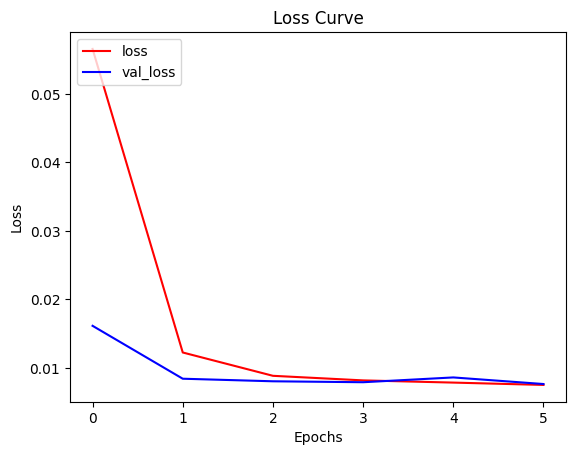

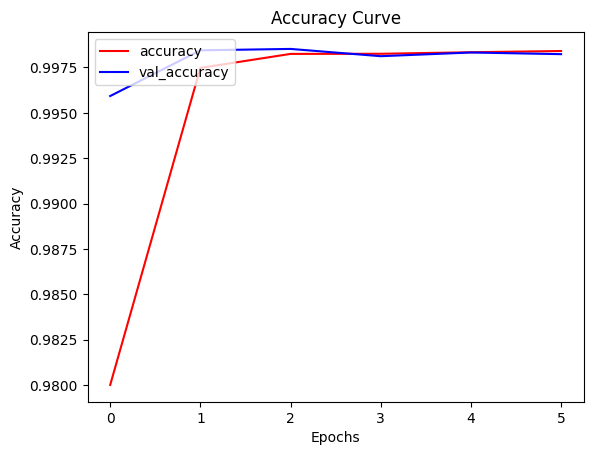

In [44]:
plot_loss_curve(h.history)
plot_acc_curve(h.history)

Nous avons d'excellent résultat pour val_accuracy et il ne semble pas y avoir d'overfitting mais un score aussi élevé implique de tester tout de même les techniques contre l'overfitting pour vérifier.

In [45]:
# Dense Neural Network -------------------------------------------------------
model = Sequential([

    # Couche d'entrée
    Dense(units=256, activation="relu"),
    # Eteint 50% des neurones de la couche pour éviter overfitting
    tf.keras.layers.Dropout(0.3),

    # 2eme couche
    Dense(units=128, activation="relu"),
    # tf.keras.layers.Dropout(0.3),

    # 3eme couche
    Dense(units=64, activation="relu"),
    # tf.keras.layers.Dropout(0.3),

    # Couche de sortie - Classification avec sigmoid
    Dense(units=1, activation="sigmoid")
  ])

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks
model_ckp = ModelCheckpoint(
    filepath = "drop_best_model.keras",
    monitor = "val_accuracy",
    mode = "max",
    save_best_only = True
  )

stop = tf.keras.callbacks.EarlyStopping(
    monitor = "val_accuracy", # Suit le val_accuracy
    patience = 3 # Attend 3 epochs avant de stopper
  )

In [48]:
# Compilation du modèle
model.compile(
    loss='binary_crossentropy', # On met binary_crossentropy plutot que
                                # categorical_crossentropy car 2 classes uniquement
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics=['accuracy', 'f1_score', 'precision', 'recall']
  )

# Entrainement
h = model.fit(
    X_train,
    y_train,
    epochs = 50,
    validation_data = (X_test, y_test),
    callbacks=[model_ckp, stop]
  )

Epoch 1/50
13328/13328 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.9593 - f1_score: 0.6661 - loss: 0.1118 - precision: 0.9730 - recall: 0.9462 - val_accuracy: 0.9941 - val_f1_score: 0.6723 - val_loss: 0.0204 - val_precision: 0.9940 - val_recall: 0.9941
Epoch 2/50
13328/13328 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - accuracy: 0.9912 - f1_score: 0.6764 - loss: 0.0292 - precision: 0.9905 - recall: 0.9920 - val_accuracy: 0.9976 - val_f1_score: 0.7047 - val_loss: 0.0115 - val_precision: 0.9963 - val_recall: 0.9989
Epoch 3/50
13328/13328 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - accuracy: 0.9949 - f1_score: 0.7154 - loss: 0.0198 - precision: 0.9935 - recall: 0.9963 - val_accuracy: 0.9980 - val_f1_score: 0.7540 - val_loss: 0.0084 - val_precision: 0.9961 - val_recall: 1.0000
Epoch 4/50
13328/13328 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - accuracy: 0.9964 - f1_score: 0.7683 - loss: 0.0143 - precision: 0.9953 - recall: 0.9975 - val_accuracy: 0.9976 - val_f1_score: 0.8107 - val_loss: 0.0095 - val_precision: 

In [49]:
# Sans Dropout (4min):

#     accuracy: 0.9981 -     f1_score: 0.7828 -     loss: 0.0092 -     precision: 0.9966 -     recall: 0.9997
# val_accuracy: 0.9985 - val_f1_score: 0.8339 - val_loss: 0.0081 - val_precision: 0.9972 - val_recall: 0.9998


# Dropout(9min):

#     accuracy: 0.9966 -     f1_score: 0.8208 -     loss: 0.0143 -     precision: 0.9952 -     recall: 0.9980
# val_accuracy: 0.9984 - val_f1_score: 0.8530 - val_loss: 0.0070 - val_precision: 0.9968 - val_recall: 1.0000

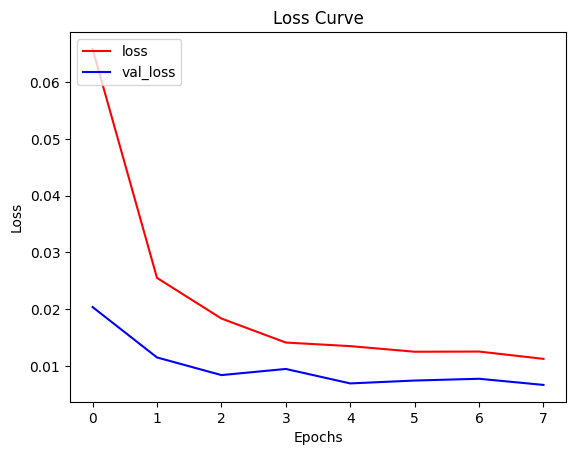

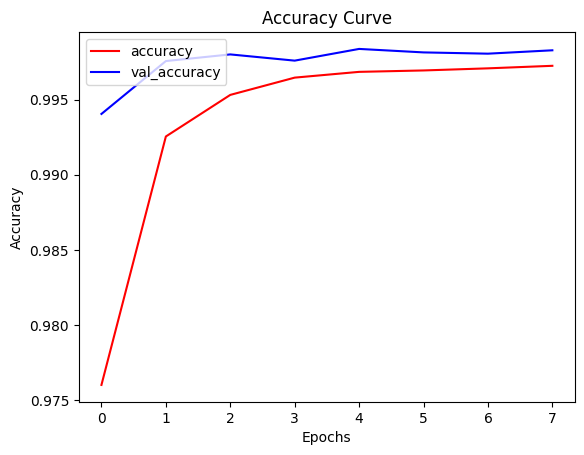

In [50]:
plot_loss_curve(h.history)
plot_acc_curve(h.history)

En regardant le val_accuracy final et les courbes, on se dit que nous avons de l'underfitting dû aux nombreux dropout qui ralentissent l'apprentissage de 40 min environ pour les quasiment identiques accuracy.

Il faudrait trouver un milieu entre aucun dropout et 50%/50%/30%.